## Exploratory Data Analysis

### This notebook demonstrates doing exploratory data analysis on the German credit dataset.

#### Features:
- Age (numeric)
- Sex (categorical: male, female)
- Job (numeric: 0 = unskilled and non-resident; 1 = unskilled and resident; 2 = skilled; 3 = highly skilled)
- Housing (categorical: own, rent, or free)
- Saving accounts (categorical: little, moderate, quite rich, rich)
- Checking account (numeric, Deutsche Mark)
- Credit amount (numeric, Deutche Mark)
- Duration (numeric, number of months)
- Purpose (categorical: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others

#### Outcome: 
- Risk (categorical: Good or Bad)



### We start by reading the data

In [1]:
# Import Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
from collections import Counter

In [2]:
# Read the data 
german = pd.read_csv('datasets/german_credit_data.csv',index_col=0) # Please read the csv with 'index_col = 0' configuration to remove unneccesary column

In [3]:
german.head() # Dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


### Basic information: size of dataset, features, non-null values, datatypes and number of unique values for each feature

In [4]:
german.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [5]:
german.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [6]:
german.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

### An overview of statistical information for each feature

In [ ]:
german.describe()

### The set of possible values for each categorical feature

In [7]:
for col in german.select_dtypes(include=[object]): 
    print(col,":", german[col].unique())

Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk : ['good' 'bad']


### Missing values for each feature

In [8]:
german.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Missing values depicted in a heat map

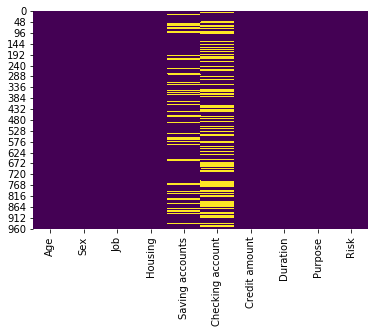

In [9]:
sns.heatmap(german.isnull(), cbar=False,cmap = 'viridis')

### The distribution of the credit amount feature of different subsets of the dataset. Is there any bias?

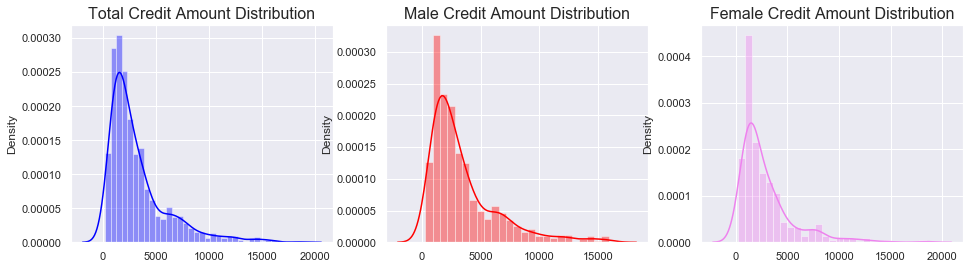

In [12]:
overall = german['Credit amount'].values  # Total credit amounts
male = german[german['Sex'] == 'male']['Credit amount'].values # Credit amounts of male
female = german[german['Sex'] == 'female']['Credit amount'].values # Credit amounts of female

fig, ax = plt.subplots(1, 3, figsize=(16,4)) # Define subplots - 1 row 3 column
sns.distplot(overall, ax=ax[0], color= 'blue')
ax[0].set_title("Total Credit Amount Distribution", fontsize=16) # Distribution plot of total credit amounts
sns.distplot(male, ax=ax[1], color="red") # Distribution plot of male credit amounts
ax[1].set_title("Male Credit Amount Distribution", fontsize=16)
sns.distplot(female, ax=ax[2], color="violet") # Distribution plot of female credit amounts
ax[2].set_title("Female Credit Amount Distribution", fontsize=16)
plt.show()

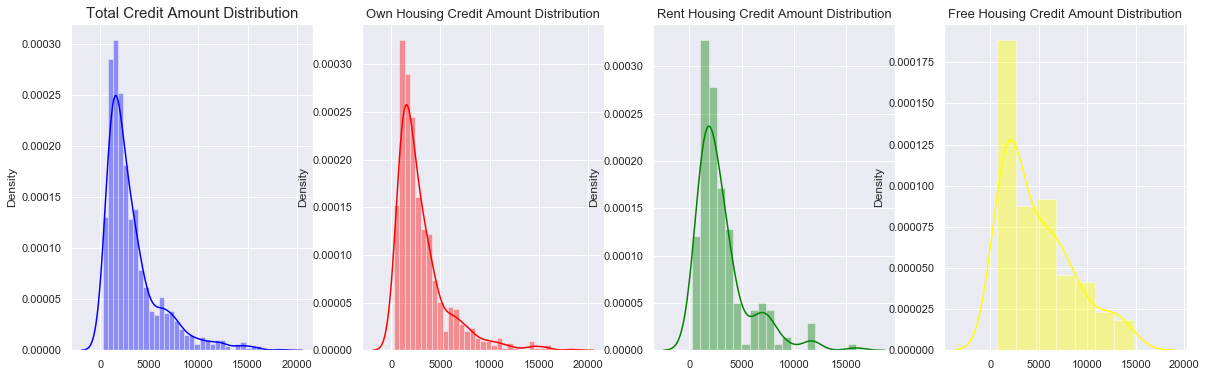

In [13]:
overall = german['Credit amount'].values  # Total credit amounts
own = german[german['Housing'] == 'own']['Credit amount'].values # Credit amounts of own housing
rent = german[german['Housing'] == 'rent']['Credit amount'].values # Credit amounts of rent housing
free = german[german['Housing'] == 'free']['Credit amount'].values # Credit amounts of free housing

fig, ax = plt.subplots(1, 4, figsize=(20,6)) # Define subplots - 1 row 4 column
sns.distplot(overall, ax=ax[0], color= 'blue')     # Distribution plot of total credit amounts
ax[0].set_title("Total Credit Amount Distribution", fontsize=15) 
sns.distplot(own, ax=ax[1], color="red") # Distribution plot of own housing credit amounts
ax[1].set_title("Own Housing Credit Amount Distribution", fontsize=13)
sns.distplot(rent, ax=ax[2], color="green") # Distribution plot of rent housing credit amounts
ax[2].set_title("Rent Housing Credit Amount Distribution", fontsize=13)
sns.distplot(free, ax=ax[3], color="yellow") # Distribution plot of free housing credit amounts
ax[3].set_title("Free Housing Credit Amount Distribution", fontsize=13)
plt.show()

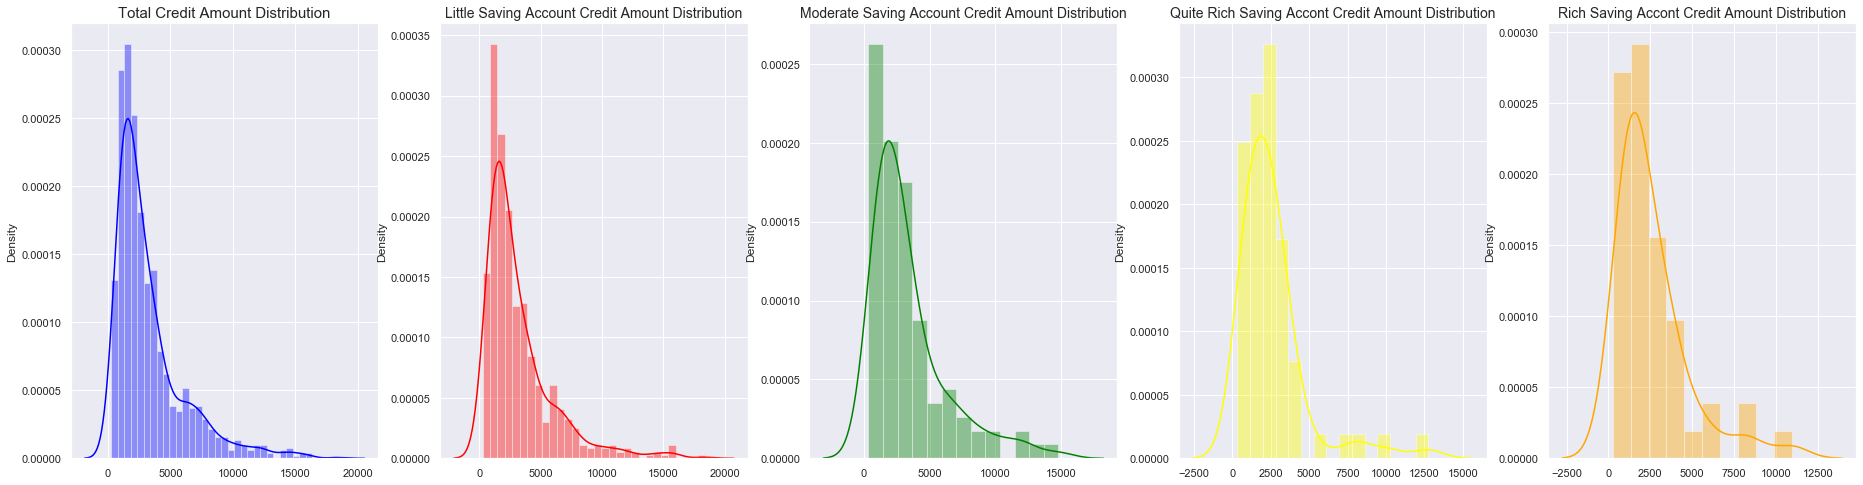

In [14]:
overall = german['Credit amount'].values  # Total credit amounts
little = german[german['Saving accounts'] == 'little']['Credit amount'].values # Credit amounts of little saving account
moderate = german[german['Saving accounts'] == 'moderate']['Credit amount'].values # Credit amounts of moderate saving account
qrich = german[german['Saving accounts'] == 'quite rich']['Credit amount'].values # Credit amounts of quite rich saving account
rich = german[german['Saving accounts'] == 'rich']['Credit amount'].values # Credit amounts of rich saving account

fig, ax = plt.subplots(1, 5, figsize=(32,8)) # Define subplots - 1 row 5 column
sns.distplot(overall, ax=ax[0], color= 'blue')   # Distribution plot of total credit amounts
ax[0].set_title("Total Credit Amount Distribution", fontsize=15) 
sns.distplot(little, ax=ax[1], color="red") # Distribution plot of little savings credit amounts
ax[1].set_title("Little Saving Account Credit Amount Distribution", fontsize=14)
sns.distplot(moderate, ax=ax[2], color="green") # Distribution plot of moderate savings credit amounts
ax[2].set_title("Moderate Saving Account Credit Amount Distribution", fontsize=14)
sns.distplot(qrich, ax=ax[3], color="yellow") # Distribution plot of quite rich savings credit amounts
ax[3].set_title("Quite Rich Saving Accont Credit Amount Distribution", fontsize=14)
sns.distplot(rich, ax=ax[4], color="orange") # Distribution plot of rich credit amounts
ax[4].set_title("Rich Saving Accont Credit Amount Distribution", fontsize=14)
plt.show()

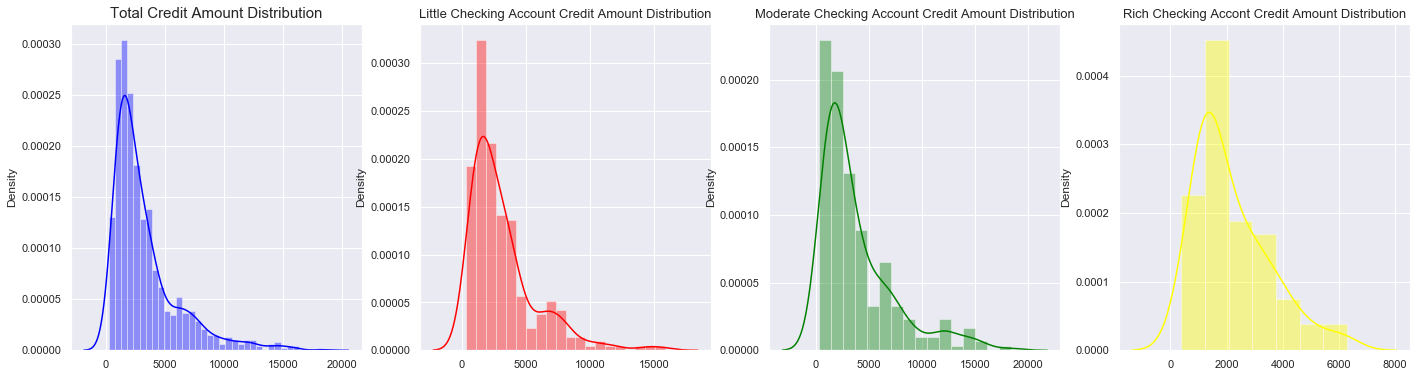

In [15]:
overall = german['Credit amount'].values  # Total credit amounts
little = german[german['Checking account'] == 'little']['Credit amount'].values # Credit amounts of little checking account
moderate = german[german['Checking account'] == 'moderate']['Credit amount'].values # Credit amounts of moderate checking account
rich = german[german['Checking account'] == 'rich']['Credit amount'].values # Credit amounts of rich checking account

fig, ax = plt.subplots(1, 4, figsize=(24,6)) # Define subplots - 1 row 4 column
sns.distplot(overall, ax=ax[0], color= 'blue')   # Distribution plot of total credit amounts
ax[0].set_title("Total Credit Amount Distribution", fontsize=15) 
sns.distplot(little, ax=ax[1], color="red") # Distribution plot of little checking credit amounts
ax[1].set_title("Little Checking Account Credit Amount Distribution", fontsize=13)
sns.distplot(moderate, ax=ax[2], color="green") # Distribution plot of moderate checking credit amounts
ax[2].set_title("Moderate Checking Account Credit Amount Distribution", fontsize=13)
sns.distplot(rich, ax=ax[3], color="yellow") # Distribution plot of rich checking credit amounts
ax[3].set_title("Rich Checking Accont Credit Amount Distribution", fontsize=13)
plt.show()

### Show the target variable distribution. Is the dataset balanced?

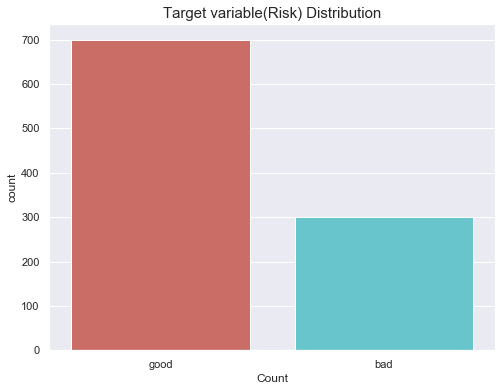

In [10]:
sns.set(rc = {'figure.figsize':(8,6)})
g1 = sns.countplot(x="Risk",data= german, palette="hls")                  
g1.set_title("Target variable(Risk) Distribution", fontsize=15)
g1.set_xlabel("Risk")
g1.set_xlabel("Count")
plt.show()

### Show distribution of age among people with good/bad credit risk and compare it with the overall distribution of age.

In [16]:
df_good = german.loc[german["Risk"] == 'good']['Age'].values.tolist() # Age of people with good credit risk
df_bad = german.loc[german["Risk"] == 'bad']['Age'].values.tolist()   # Age of people with bad credit risk
df_age = german['Age'].values.tolist()

# Age distribution of people with good credit risk
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
# Age distribution of people with good credit risk
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
# Age distribution of people in the dataset
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good Credit','Bad Credit', 'Overall Age Distribuition'))

#Setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribution', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/Users/bmassacci/opt/anaconda3/envs/xai/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### A regression plot is a scatter plot that includes a linear regression line representing the best fitting linear relationship between the variables. What do the following regression plots say about the variables depicted?

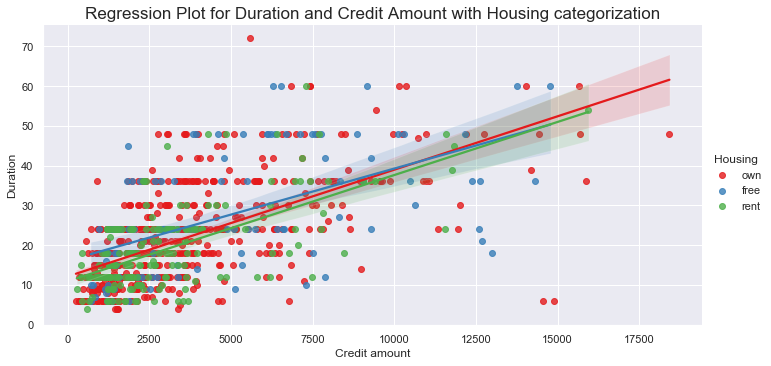

In [11]:
sns.lmplot(x="Credit amount",y="Duration", hue="Housing", data=german, palette="Set1", aspect=2) # Linear relationship between credit amount and duration variables with housing seperation
plt.title('Regression Plot for Duration and Credit Amount with Housing categorization', fontsize=17)
plt.show()

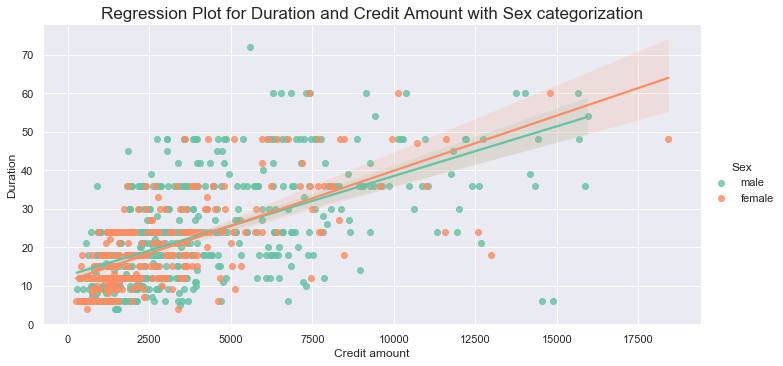

In [17]:
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=german, palette="Set2", aspect=2)# Linear relationship between credit amount and duration variables with sex seperation
plt.title('Regression Plot for Duration and Credit Amount with Sex categorization', fontsize=17)
plt.show()

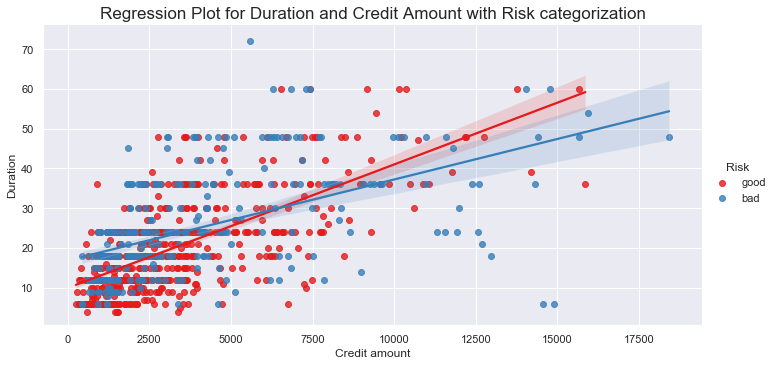

In [18]:
sns.lmplot(x="Credit amount",y="Duration", hue="Risk", data=german, palette="Set1", aspect=2) # Linear relationship between credit amount and duration variables with risk seperation
plt.title('Regression Plot for Duration and Credit Amount with Risk categorization', fontsize=17)
plt.show()

### The following diagram with boxplots show the distribution of the credit amount variable among both sexes for different values of the purpose variable.

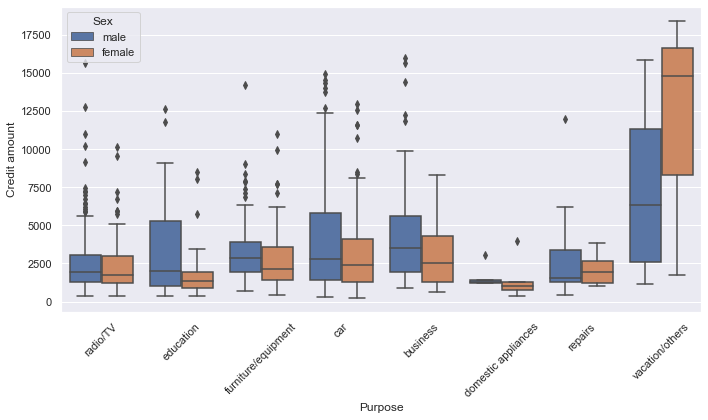

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
box = sns.boxplot(x= 'Purpose',y= 'Credit amount', hue= 'Sex', data=german) # Distribution of credit amount across purpose feature with Sex categorization
box.set_xticklabels(box.get_xticklabels(), rotation= 45) # Properties like minimum, first quartile, median, third quartile, maximum and outliers can be detected
fig.subplots_adjust(bottom=0.2)
plt.tight_layout()

### The following diagram with boxplots show the distribution of the credit amount variable among both sexes for different values of the housing variable.

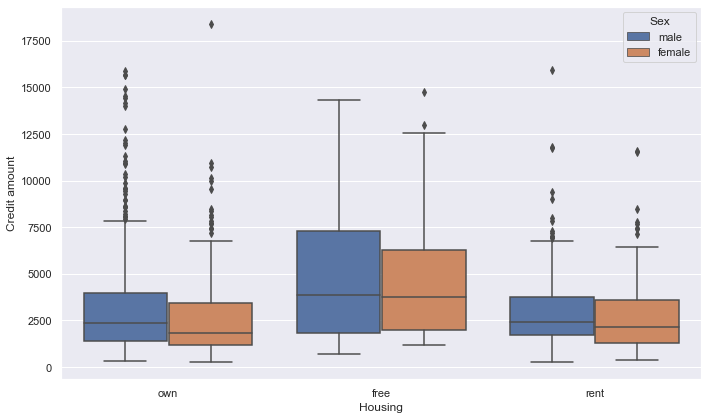

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
box = sns.boxplot(x= 'Housing',y= 'Credit amount', hue= 'Sex', data=german) # Distribution of credit amount across housing feature with Sex categorization
box.set_xticklabels(box.get_xticklabels(), rotation= 0)
fig.subplots_adjust(bottom=0.2)
plt.tight_layout()

### The following count plot shows the distribution across age of entries with good and bad risk.

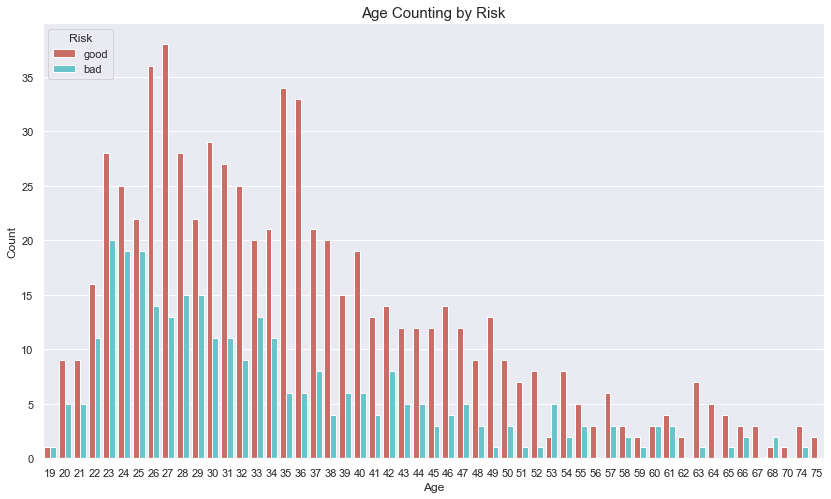

In [21]:
sns.set(rc = {'figure.figsize':(14,8)})
g2 = sns.countplot(x="Age",data= german,  # Histogram across age feature with risk categorization
              palette="hls", 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_ylabel("Count")
plt.show()

### Some further diagrams: a count plot, a violin plot and a box plot. What do these diagrams depict?

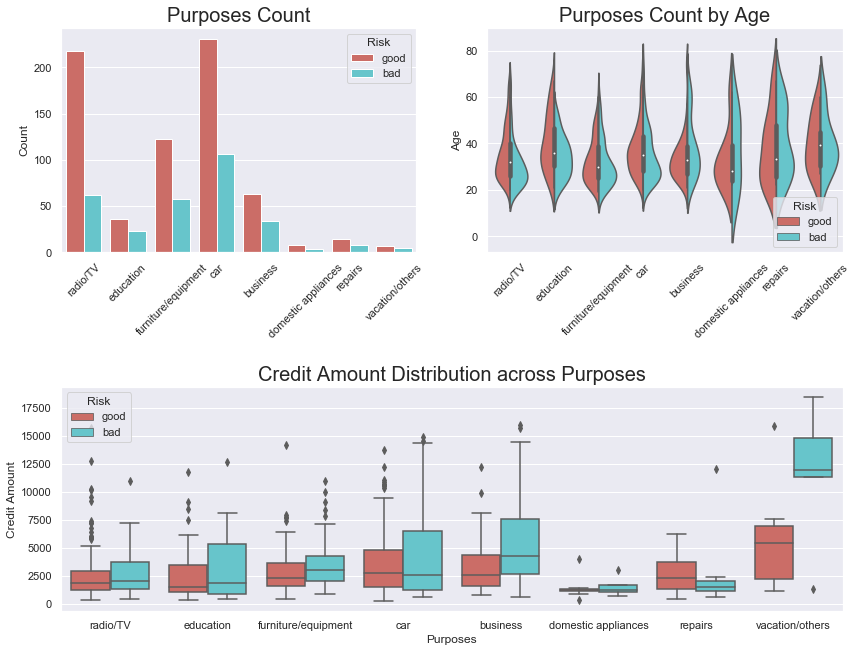

In [22]:
plt.figure(figsize = (14,12))

# Histogram across purposes with risk categorization
plt.subplot(221)             
g = sns.countplot(x="Purpose", data= german, 
              palette="hls", hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

# Distribution of age across purposes with risk categorization
plt.subplot(222)             
g1 = sns.violinplot(x="Purpose", y="Age", data= german, 
                    palette="hls", hue = "Risk",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Purposes Count by Age", fontsize=20)

# Distribution of credit amount across purposes with risk categorization
plt.subplot(212)             
g2 = sns.boxplot(x="Purpose", y="Credit amount", data= german, 
               palette="hls", hue = "Risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount Distribution across Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

###  A scatter polar plot showing the distribution of credit across purposes

In [23]:
radio_tv = np.sum(german[german['Purpose'] == 'radio/TV']['Credit amount'].values)
education = np.sum(german[german['Purpose'] == 'education']['Credit amount'].values)
furniture = np.sum(german[german['Purpose'] == 'furniture/equipment']['Credit amount'].values)
car = np.sum(german[german['Purpose'] == 'car']['Credit amount'].values)
business = np.sum(german[german['Purpose'] == 'business']['Credit amount'].values)
domestic_app = np.sum(german[german['Purpose'] == 'domestic appliances']['Credit amount'].values)
repairs = np.sum(german[german['Purpose'] == 'repairs']['Credit amount'].values)
vacation_others = np.sum(german[german['Purpose'] == 'vacation/others']['Credit amount'].values)

purposes = pd.DataFrame(data=[[radio_tv, education, furniture, car, business, domestic_app, repairs, vacation_others]],
                          columns= german["Purpose"].unique())

data = [               
    go.Scatterpolar(
        r = [radio_tv, education, furniture,car, business, domestic_app, repairs, vacation_others],
        theta = german['Purpose'].unique().tolist(),
        line = dict(
            color = "#ff7f50"
        ),
        mode = 'lines+markers',
        fill='toself',
        marker = dict(
            color = '#8090c7',
            symbol='square',
            size=6
        )
    )
]

layout = go.Layout(
    showlegend = False,
    title= "Credit Distribution across Purposes",
    paper_bgcolor = "rgb(255, 245, 250)"
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = 'polar/basic')